### Load in the necessary libraries

In [25]:
# Numpy
import numpy as np

# Matplotlib.pyplot
import matplotlib.pyplot as plt

# Pandas
import pandas as pd

# Math
import math

### State the constant values

In [2]:
# Universal gas constant for dry air
rd = 287.05 # [J / (Kg K)]

# Acceleration due to gravity
g = 9.81 # [m/s^2]

### Create your isothermal model

In [11]:
def Isothermal(Pressure, z0, t0, p0):
    # Creating an empty array
    Iso_height = []
    # Loop to run through all data
    for i in range (len(Pressure)):
        # Isothermal equation
        z = z0 + ((rd * t0) / g) * (np.log(p0 / Pressure[i]))
        # Fills in the Iso_height array
        Iso_height.append(z)
    # Returns the Iso_height array
    return Iso_height

### Create your Explicit model

In [15]:
def Explicit(z0, Pressure, Temp):
    # Creating an empty array
    Expo_height = [z0]
    # Loop to start at index 1 and run until the end of the variables
    for i in range(1, len(Pressure)):
        # Calculating average temperature
        Tavg = (Temp[i - 1] + Temp[i]) / 2
        # Calculating average pressure
        Pavg = (Pressure[i - 1] + Pressure[i]) / 2
        # Explicit equation
        z = Expo_height[i - 1] + ((rd / g) * Tavg * (1 / Pavg) * (Pressure[i - 1] - Pressure[i]))
        # Fills in the Expo_height array
        Expo_height.append(z)
    # Returns the Expo_height array
    return Expo_height

### Reading the data

In [8]:
# Access the file using pandas
Data = pd.read_csv('20230908_1718_WyoSonde2.csv')

# Extract the variables
Pressure = Data['P'] # [hPa]
Temp = Data['T'] + 273.15 # [K]
Height = Data['Alt'] # [m]

### Finding initial conditions
All arragys begin with index 0 in Python

In [9]:
T0 = Temp[0]
Z0 = Height[0]
P0 = Pressure[0]

### Calling the Isothermal and Explicit functions

In [16]:
# Isothermal model
Iso_height = np.array(Isothermal(Pressure, Z0, T0, P0)) # [m]

# Explicit model
Expo_height = np.array(Explicit(Z0, Pressure, Temp)) # [m]

# Converting to kilometers
Iso = Iso_height / 1000 # [km]
Exp = Expo_height / 1000 # [km]

### Plot 1

Text(0.5, 1.0, 'Isothermal versus Explicit Models')

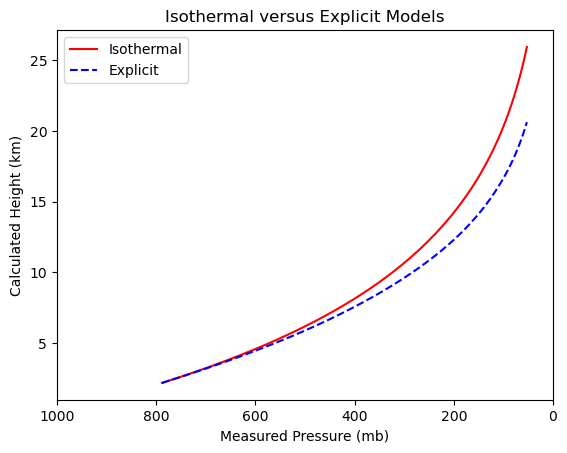

In [20]:
# Plot the isothermal model
plt.plot(Pressure, Iso, color = 'red', label = 'Isothermal')
# Plot the explicit model
plt.plot(Pressure, Exp, '--', color = 'blue', label = 'Explicit')
# Invert the x-axis
plt.gca().invert_xaxis()
# Set x-axis limits
plt.xlim(1000, 0)
# X-axis label
plt.xlabel('Measured Pressure (mb)')
# Y-axis label
plt.ylabel('Calculated Height (km)')
# Plot legend
plt.legend(loc = 'upper left')
# Plot title
plt.title('Isothermal versus Explicit Models')

### Convert the observed height to kilometers

In [21]:
# Turning the height variable into a numpy array
Alt = np.array(Height)

# Conversion
Z = Alt / 1000 # [km]

### Plot 2

Text(0.5, 1.0, 'Calculated versus Measured Height')

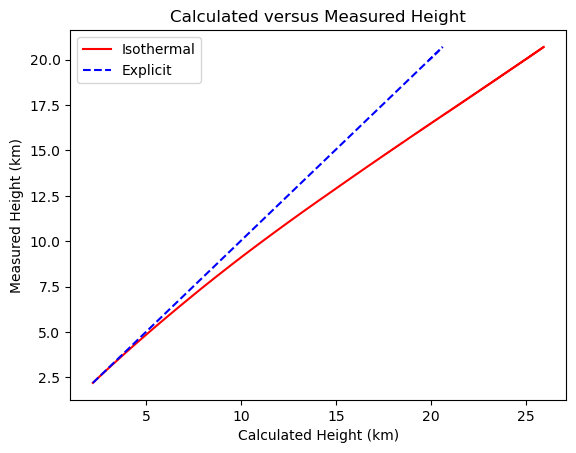

In [22]:
# Plot the isothermal model
plt.plot(Iso, Z, color = 'red', label = 'Isothermal')
# Plot the explicit model
plt.plot(Exp, Z, '--', color = 'blue', label = 'Explicit')
# X-axis label
plt.xlabel('Calculated Height (km)')
# Y-axis label
plt.ylabel('Measured Height (km)')
# Plot legend
plt.legend(loc = 'upper left')
# Plot title
plt.title('Calculated versus Measured Height')

### Calculate the difference between the calcualted height and measured height

In [23]:
# Isothermal model
Iso_diff = (Iso - Z) * 1000 # [m]

# Explicit model
Exp_diff = (Exp - Z) * 1000 # [m]

### Plot 3

Text(0.5, 1.0, 'Computed versus Measured Height Differences')

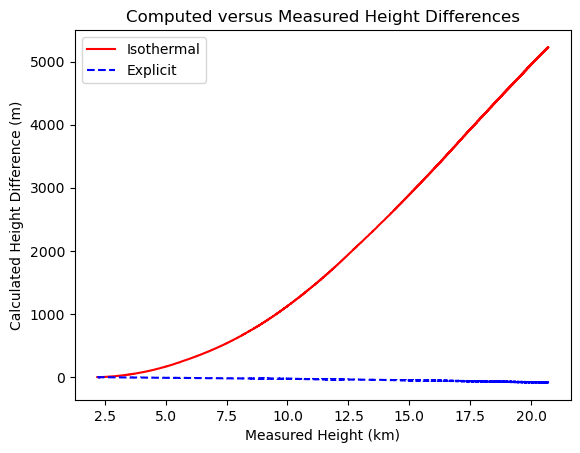

In [24]:
# Plot the isothermal model
plt.plot(Z, Iso_diff, color = 'red', label = 'Isothermal')
# Plot the explicit model
plt.plot(Z, Exp_diff, '--', color = 'blue', label = 'Explicit')
# X-axis label
plt.xlabel('Measured Height (km)')
# Y-axis label
plt.ylabel('Calculated Height Difference (m)')
# Plot legend
plt.legend(loc = 'upper left')
# Plot title
plt.title('Computed versus Measured Height Differences')